In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from scipy import stats


In [98]:
# Load dataset (Assuming it's a CSV file)
df = pd.read_csv("superstore_final_dataset.csv", encoding='ISO-8859-1')
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [99]:
# Check for missing values
df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [100]:
# Fill missing postal codes with the most frequent value (mode)
df['Postal_Code'] = df['Postal_Code'].fillna(df['Postal_Code'].mode()[0])


In [101]:
df.isnull().sum()



Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64

In [102]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)


In [103]:
# Check and remove leading/trailing spaces from all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [104]:
# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Outliers: {outliers}')



Outliers: [  0   0 123]


In [105]:

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from all numerical columns
for col in df.select_dtypes(include=['number']).columns:
    df = remove_outliers(df, col)

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Outliers removed successfully!")


Outliers removed successfully!


In [106]:
# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Outliers: {outliers}')



Outliers: [  0   0 194]


In [107]:

# Function to remove outliers using IQR with a higher threshold
def remove_outliers(df, column, threshold=1.75):  # Increased from 1.5 to 1.75
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from all numerical columns
for col in df.select_dtypes(include=['number']).columns:
    df = remove_outliers(df, col)

# Save the cleaned dataset
df.to_csv("cleaned_dataset2.csv", index=False)

print("Outliers removed successfully!")


Outliers removed successfully!


In [108]:
# Finding outliers

z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Outliers: {outliers}')


Outliers: [  0   0 110]


In [109]:


# Function to remove outliers using IQR with an even higher threshold
def remove_outliers(df, column, threshold=2.0):  # Increased threshold to 2.0
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from all numerical columns
for col in df.select_dtypes(include=['number']).columns:
    df = remove_outliers(df, col)

# Save the cleaned dataset
df.to_csv("cleaned_dataset3.csv", index=False)

print("Outliers removed successfully!")


Outliers removed successfully!


In [110]:
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Outliers: {outliers}')


Outliers: [ 0  0 64]


In [111]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")



Number of duplicate rows: 0


In [112]:
# Data Preprocessing
df.dropna(inplace=True)  # Dropping missing values
label_encoders = {}



# Encoding categorical variables
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Splitting features and target variable
X = df.drop(columns=['Sales', 'Row_ID', 'Order_ID', 'Order_Date','Ship_Date', 'Customer_ID', 'Customer_Name', 'Product_Name'])  # Assuming 'Sales' is the target variable
y = df['Sales']


In [113]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [114]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = df.select_dtypes(include=['float64', 'int32']).columns


normalizer = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = normalizer.fit_transform(df[numerical_cols])



In [115]:


print("\nNormalized DataFrame:")
print(df_normalized.head())






Normalized DataFrame:
   Row_ID  Order_ID  Order_Date  Ship_Date  Ship_Mode  Customer_ID  \
2       3      1979         138        314          2          237   
4       5      3789          77        411          3          702   
5       6       166        1188        227          3           88   
6       7       166        1188        227          3           88   
8       9       166        1188        227          3           88   

   Customer_Name  Segment  Country  City  State  Postal_Code  Region  \
2            201        1        0   256      3     0.905312       3   
4            685        0        0   148      8     0.325587       2   
5            113        0        0   256      3     0.905271       3   
6            113        0        0   256      3     0.905271       3   
8            113        0        0   256      3     0.905271       3   

   Product_ID  Category  Sub_Category  Product_Name     Sales  
2         862         1             9          1239  0.0546

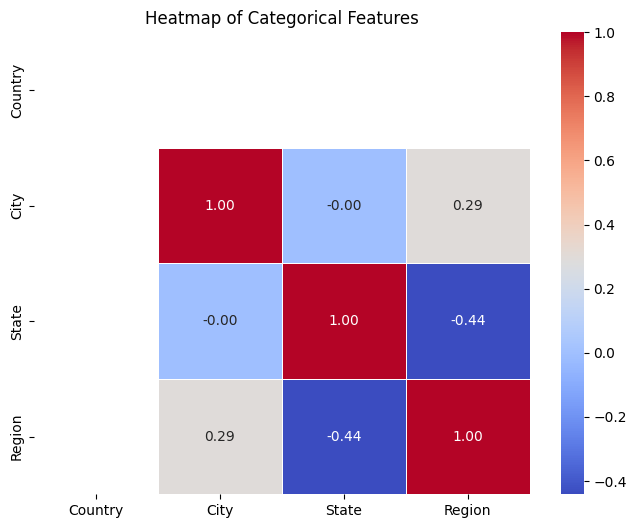

In [116]:

# Selecting the categorical columns
categorical_columns = ['Country', 'City', 'State', 'Region']

# Compute the correlation matrix
correlation_matrix = df[categorical_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Categorical Features")
plt.show()


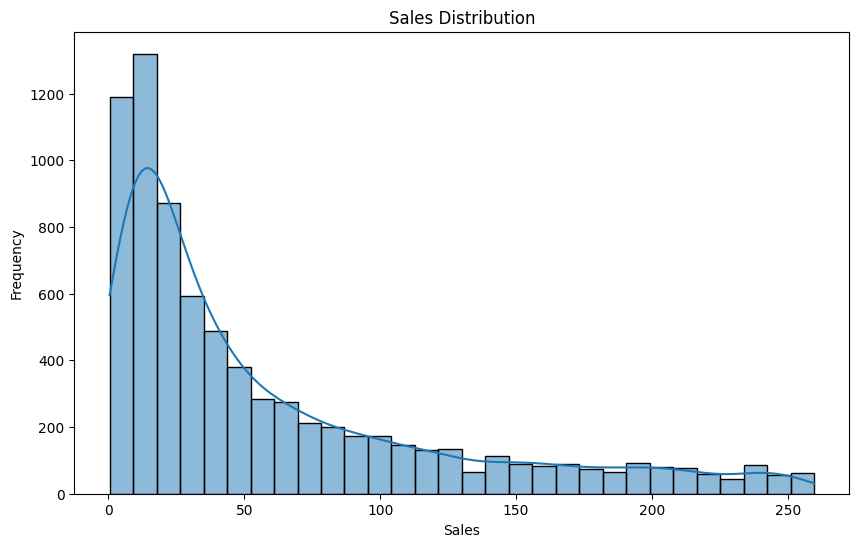

In [117]:
# Histogram for Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


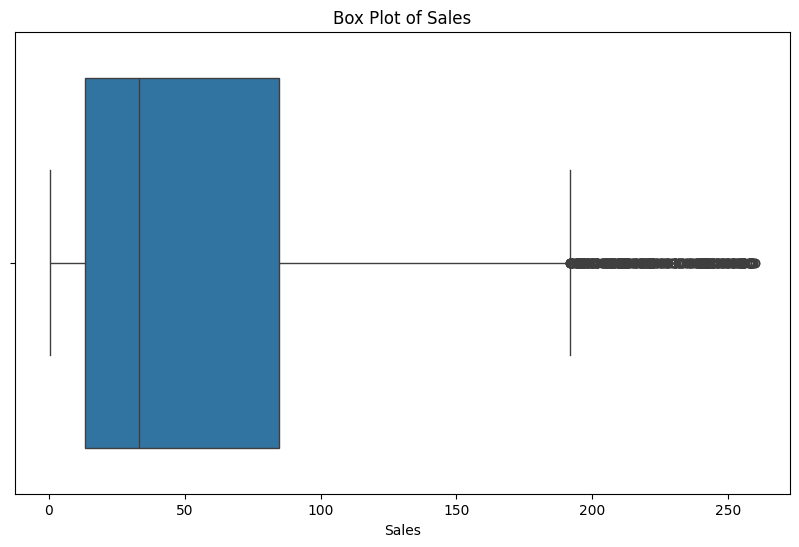

In [118]:
# Box plot for Sales to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()


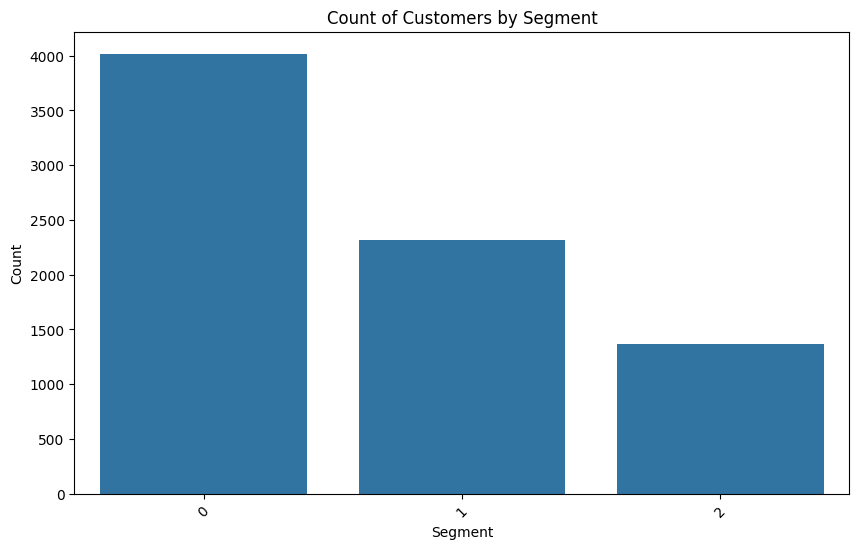

In [119]:
# Count plot for Segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment')
plt.title('Count of Customers by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

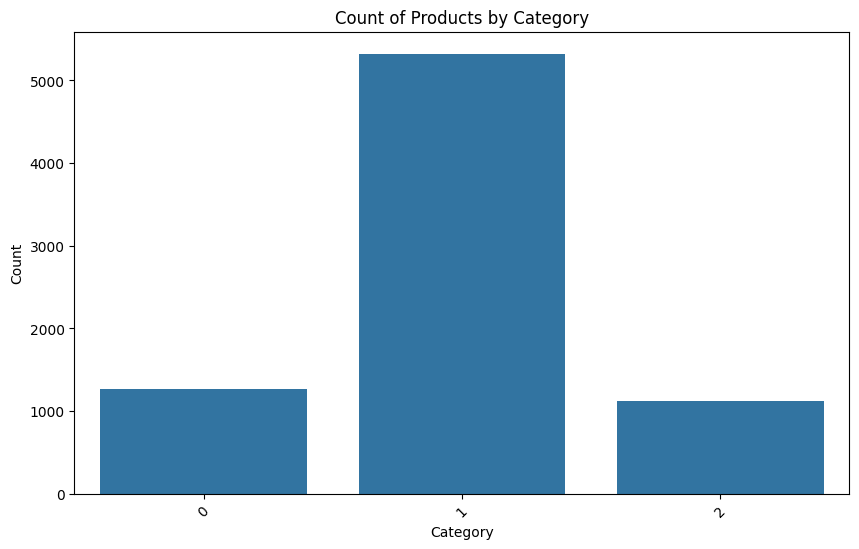

In [120]:
# Count plot for Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

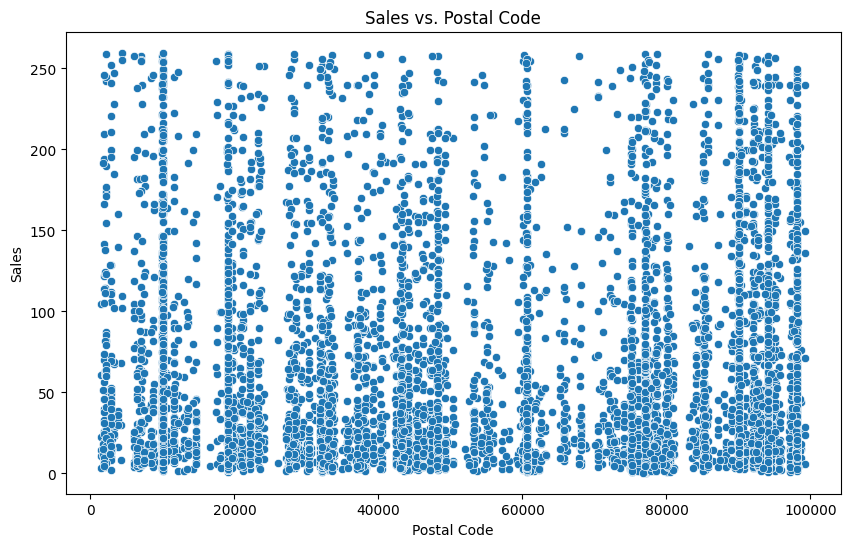

In [121]:

# Scatter plot to analyze relationship between Sales and Postal_Code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Postal_Code', y='Sales')
plt.title('Sales vs. Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Sales')
plt.show()


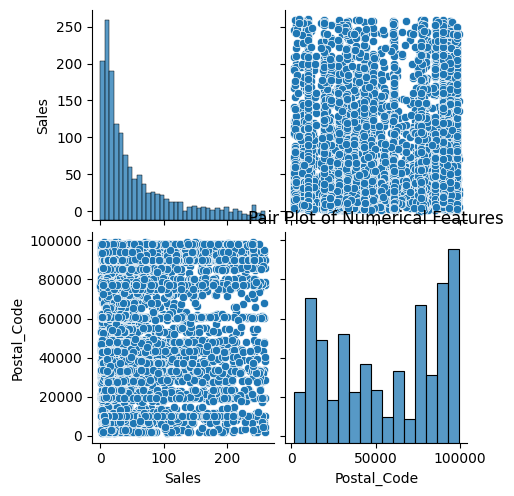

In [122]:
# Pair plot to visualize relationships between numerical features
sns.pairplot(df[['Sales', 'Postal_Code']])
plt.title('Pair Plot of Numerical Features')
plt.show()


In [123]:
# Calculate the correlation matrix using only numeric columns
correlation_matrix = df[numerical_cols].corr()  # Use only numeric columns



Explained variance ratio: [0.50486006 0.49513994]


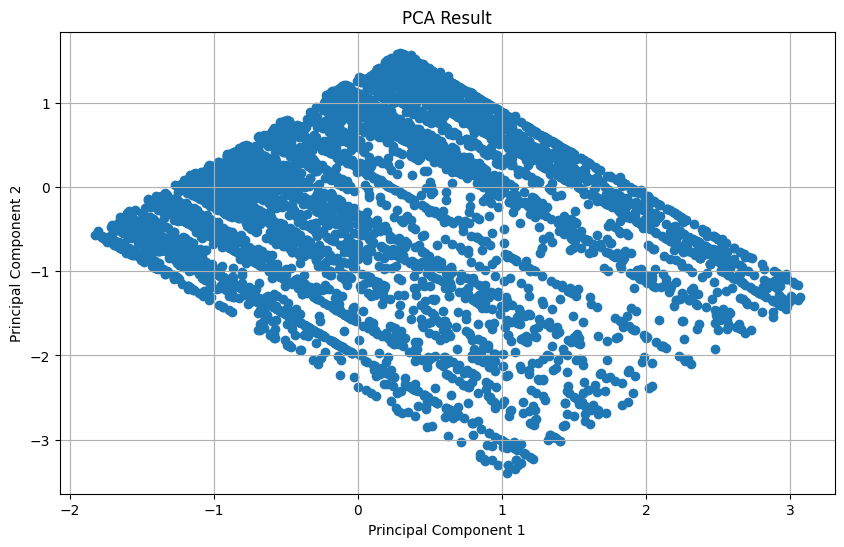

In [124]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

if 'Postal_Code' in df.columns:
    df['Postal_Code'] = df['Postal_Code'].fillna(df['Postal_Code'].mode()[0])

# Drop unnecessary columns
df = df.drop(columns=['Row_ID', 'Customer_Name'], errors='ignore')

# Filter out negative sales
df = df[df['Sales'] >= 0]

# Select numerical columns for PCA
numerical_cols = df.select_dtypes(include=['float64', 'int32']).columns

# Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Display the explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [125]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [126]:
# Model Training and Evaluation
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} MAE: {mae:.4f}, MSE: {mse:.4f}")
    joblib.dump(model, f"{model_name}.pkl")  # Saving the model


In [127]:
# Training different models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=2000, max_depth=500, random_state=42),
    "SVR": SVR(kernel='linear'),
    "KNN": KNeighborsRegressor(n_neighbors=100)
}

In [128]:
for name, model in models.items():
    train_and_evaluate(model, name)

RandomForest MAE: 38.3845, MSE: 2785.6299
SVR MAE: 44.5244, MSE: 4699.7334
KNN MAE: 42.9117, MSE: 3391.7633
